In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import pandas as pd 
import nltk
nltk.download('wordnet')
from IPython.display import Image

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emreb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
stemmer = SnowballStemmer("english")

In [4]:

data = pd.read_csv('C:/Users/emreb/Documents/projects/newonelast/redditdata//abcnews-date-text.csv', on_bad_lines="skip")
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

In [5]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [6]:
len(data)

1244184

In [7]:
doc_sample = documents[documents['index'] == 40310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['actor', 'launches', 'coffs', 'green', 'plan']


 tokenized and lemmatized document: 
['actor', 'launch', 'coff', 'green', 'plan']


In [8]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [10]:
dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n= 100000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[5200]

[(142, 1), (240, 1), (585, 1), (1330, 1), (4651, 1)]

In [12]:
bow_doc_5200 = bow_corpus[5200]
for i in range(len(bow_doc_5200)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_5200[i][0], 
                                               dictionary[bow_doc_5200[i][0]], 
bow_doc_5200[i][1]))

Word 142 ("threat") appears 1 time.
Word 240 ("polic") appears 1 time.
Word 585 ("darwin") appears 1 time.
Word 1330 ("interview") appears 1 time.
Word 4651 ("boy") appears 1 time.


In [13]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5844216176085719),
 (1, 0.38716866963787633),
 (2, 0.5013820927104505),
 (3, 0.5071171375845095)]


In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary,  workers=2,passes=2)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.043*"sydney" + 0.026*"news" + 0.017*"perth" + 0.016*"miss" + 0.016*"arrest" + 0.016*"melbourn" + 0.013*"take" + 0.013*"quarantin" + 0.012*"interview" + 0.011*"bank"
Topic: 1 
Words: 0.025*"live" + 0.019*"canberra" + 0.017*"victorian" + 0.017*"rise" + 0.016*"market" + 0.014*"die" + 0.012*"price" + 0.012*"australian" + 0.011*"fall" + 0.011*"show"
Topic: 2 
Words: 0.026*"hous" + 0.021*"tasmania" + 0.018*"scott" + 0.014*"andrew" + 0.014*"power" + 0.013*"industri" + 0.013*"farm" + 0.011*"build" + 0.009*"northern" + 0.009*"go"
Topic: 3 
Words: 0.036*"victoria" + 0.032*"elect" + 0.020*"coronavirus" + 0.019*"china" + 0.017*"lockdown" + 0.016*"border" + 0.015*"morrison" + 0.013*"royal" + 0.012*"countri" + 0.011*"presid"
Topic: 4 
Words: 0.072*"australia" + 0.039*"trump" + 0.024*"record" + 0.022*"test" + 0.022*"donald" + 0.020*"world" + 0.018*"coast" + 0.018*"south" + 0.016*"adelaid" + 0.015*"north"
Topic: 5 
Words: 0.032*"govern" + 0.018*"school" + 0.018*"chang" + 0.015*"busi

Running LDA using TF-IDF

In [16]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"news" + 0.013*"tasmania" + 0.012*"royal" + 0.011*"andrew" + 0.011*"commiss" + 0.007*"mother" + 0.007*"busi" + 0.006*"octob" + 0.006*"footag" + 0.006*"grandstand"
Topic: 1 Word: 0.014*"donald" + 0.012*"australia" + 0.009*"morrison" + 0.009*"scott" + 0.007*"world" + 0.007*"friday" + 0.007*"monday" + 0.006*"test" + 0.006*"cricket" + 0.006*"australian"
Topic: 2 Word: 0.010*"queensland" + 0.010*"weather" + 0.008*"street" + 0.008*"wall" + 0.008*"western" + 0.007*"peter" + 0.006*"year" + 0.006*"australia" + 0.005*"festiv" + 0.005*"celebr"
Topic: 3 Word: 0.014*"lockdown" + 0.013*"interview" + 0.007*"mark" + 0.007*"extend" + 0.007*"white" + 0.007*"alan" + 0.007*"leagu" + 0.006*"rugbi" + 0.006*"grand" + 0.006*"facebook"
Topic: 4 Word: 0.018*"vaccin" + 0.011*"elect" + 0.007*"liber" + 0.007*"michael" + 0.007*"explain" + 0.007*"presid" + 0.007*"biden" + 0.006*"say" + 0.006*"brief" + 0.005*"septemb"
Topic: 5 Word: 0.014*"rural" + 0.009*"climat" + 0.008*"price" + 0.008*"market" 

Performance evaluation by classifying sample

In [17]:
for index, score in sorted(lda_model[bow_corpus[5200]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.32371726632118225	 
Topic: 0.046*"polic" + 0.032*"case" + 0.024*"death" + 0.023*"charg" + 0.022*"court" + 0.021*"year" + 0.018*"murder" + 0.016*"alleg" + 0.016*"woman" + 0.016*"help"

Score: 0.20964930951595306	 
Topic: 0.043*"sydney" + 0.026*"news" + 0.017*"perth" + 0.016*"miss" + 0.016*"arrest" + 0.016*"melbourn" + 0.013*"take" + 0.013*"quarantin" + 0.012*"interview" + 0.011*"bank"

Score: 0.1833345890045166	 
Topic: 0.025*"kill" + 0.022*"bushfir" + 0.022*"attack" + 0.021*"warn" + 0.019*"australian" + 0.016*"dead" + 0.014*"travel" + 0.013*"lose" + 0.009*"second" + 0.009*"cricket"

Score: 0.18327577412128448	 
Topic: 0.032*"govern" + 0.018*"school" + 0.018*"chang" + 0.015*"busi" + 0.014*"final" + 0.014*"indigen" + 0.013*"communiti" + 0.013*"work" + 0.012*"region" + 0.011*"hospit"

Score: 0.016673076897859573	 
Topic: 0.026*"hous" + 0.021*"tasmania" + 0.018*"scott" + 0.014*"andrew" + 0.014*"power" + 0.013*"industri" + 0.013*"farm" + 0.011*"build" + 0.009*"northern" + 0.009*"g

Performance evaluation by classifying sample document using LDA TF-IDF 

In [18]:
for index, score in sorted(lda_model_tfidf[bow_corpus[5200]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.734481692314148	 
Topic: 0.022*"trump" + 0.018*"polic" + 0.015*"charg" + 0.012*"woman" + 0.012*"murder" + 0.010*"alleg" + 0.010*"crash" + 0.009*"drum" + 0.009*"death" + 0.008*"shoot"

Score: 0.13215577602386475	 
Topic: 0.014*"lockdown" + 0.013*"interview" + 0.007*"mark" + 0.007*"extend" + 0.007*"white" + 0.007*"alan" + 0.007*"leagu" + 0.006*"rugbi" + 0.006*"grand" + 0.006*"facebook"

Score: 0.01667204685509205	 
Topic: 0.022*"coronavirus" + 0.021*"covid" + 0.012*"case" + 0.010*"border" + 0.008*"quarantin" + 0.008*"queensland" + 0.008*"wednesday" + 0.008*"north" + 0.008*"christma" + 0.007*"record"

Score: 0.016670791432261467	 
Topic: 0.010*"queensland" + 0.010*"weather" + 0.008*"street" + 0.008*"wall" + 0.008*"western" + 0.007*"peter" + 0.006*"year" + 0.006*"australia" + 0.005*"festiv" + 0.005*"celebr"

Score: 0.01667068898677826	 
Topic: 0.017*"countri" + 0.013*"coronavirus" + 0.012*"restrict" + 0.012*"hour" + 0.008*"covid" + 0.008*"pandem" + 0.008*"financ" + 0.006*"domest"

### Testing Section

In [22]:
unseen_document= '''I met a traveller from an antique land,
                    Who said—“Two vast and trunkless legs of stone
                    Stand in the desert. . . . Near them, on the sand,
                    Half sunk a shattered visage lies, whose frown,
                    And wrinkled lip, and sneer of cold command,
                    Tell that its sculptor well those passions read
                    Which yet survive, stamped on these lifeless things,
                    The hand that mocked them, and the heart that fed;
                    And on the pedestal, these words appear:
                    My name is Ozymandias, King of Kings;'''

print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

I met a traveller from an antique land,
                    Who said—“Two vast and trunkless legs of stone
                    Stand in the desert. . . . Near them, on the sand,
                    Half sunk a shattered visage lies, whose frown,
                    And wrinkled lip, and sneer of cold command,
                    Tell that its sculptor well those passions read
                    Which yet survive, stamped on these lifeless things,
                    The hand that mocked them, and the heart that fed;
                    And on the pedestal, these words appear:
                    My name is Ozymandias, King of Kings;
Score: 0.22392186522483826	 Topic: 0.025*"kill" + 0.022*"bushfir" + 0.022*"attack" + 0.021*"warn" + 0.019*"australian"
Score: 0.1912335753440857	 Topic: 0.043*"sydney" + 0.026*"news" + 0.017*"perth" + 0.016*"miss" + 0.016*"arrest"
Score: 0.163381427526474	 Topic: 0.064*"covid" + 0.032*"coronavirus" + 0.025*"vaccin" + 0.019*"call" + 0.016*"restrict"
Score: 

In [32]:
from gensim.models import CoherenceModel

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model= lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.138452419293177


In [21]:
# import zipfile
import pyLDAvis
import pyLDAvis.gensim 

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [26]:
pyLDAvis.enable_notebook()
visal = pyLDAvis.gensim.prepare(lda_model,  bow_corpus,dictionary)
visal
# Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
# A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.138015 -0.206994       1        1  11.819380
8     -0.215343 -0.136268       2        1  11.738042
5     -0.207184 -0.116560       3        1  11.661939
4     -0.027844  0.183311       4        1  11.126157
2     -0.118774 -0.124284       5        1   9.821592
1     -0.101831  0.164541       6        1   9.609325
9      0.079375  0.205018       7        1   9.187837
3      0.173685 -0.107439       8        1   8.835280
0     -0.000433  0.193455       9        1   8.539340
7      0.280333 -0.054780      10        1   7.661107, topic_info=             Term          Freq         Total Category  logprob  loglift
38      australia  37816.000000  37816.000000  Default  30.0000  30.0000
25345       covid  35055.000000  35055.000000  Default  29.0000  29.0000
2051   queensland  24587.000000  24587.000000  Default  28.0000  28.0000
240         polic  32355.000000  32355.000000  Default  27.0000  27.0000
1505     victoria  20771.000000  20771.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
946         ralli   2809.384689   2817.006077  Topic10  -5.0554   2.5663
348       protest   8556.889194  12373.656372  Topic10  -3.9416   2.2002
488         trial   4493.835240   9013.623759  Topic10  -4.5857   1.8730
2211       sydney   4345.895185  22450.537736  Topic10  -4.6191   0.9269
863      melbourn   3408.451164  16349.806836  Topic10  -4.8621   1.0011

[423 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
326       3  0.999851  aborigin
1939      1  0.802576      abus
1939      3  0.197202      abus
215       1  0.978506     accus
215      10  0.021366     accus
...     ...       ...       ...
1127      4  0.250883      year
361       6  0.999752     young
117       3  0.999301     youth
117      10  0.000303     youth
388       4  0.999756   zealand

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 6, 5, 3, 2, 10, 4, 1, 8])

In [ ]:
#  results shows consistency that's nice

 TFI-IDF Table

In [29]:
visaltf_idf = pyLDAvis.gensim.prepare(lda_model_tfidf,  corpus_tfidf,dictionary)
visaltf_idf

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051715  0.176405       1        1  14.305216
0      0.161969 -0.302183       2        1  10.879381
6      0.053510 -0.022101       3        1  10.387424
4     -0.178447 -0.067883       4        1   9.998485
5      0.083371  0.025971       5        1   9.762801
7     -0.241705 -0.047624       6        1   9.565238
2     -0.225249  0.036398       7        1   9.183125
3      0.092743  0.112134       8        1   8.866613
9      0.127701  0.120071       9        1   8.716305
8      0.074391 -0.031188      10        1   8.335413, topic_info=            Term         Freq         Total Category  logprob  loglift
7337       trump  7285.000000   7285.000000  Default  30.0000  30.0000
1281        news  5765.000000   5765.000000  Default  29.0000  29.0000
1568      donald  4685.000000   4685.000000  Default  28.0000  28.0000
2951        drum  3397.000000   3397.000000  Default  27.0000  27.0000
197        crash  4275.000000   4275.000000  Default  26.0000  26.0000
...          ...          ...           ...      ...      ...      ...
2029       pacif   923.362229   1666.216354  Topic10  -5.4506   1.8944
2121        wild   814.310383   1181.059723  Topic10  -5.5763   2.1128
1287       great   843.704864   1443.573494  Topic10  -5.5408   1.9476
38     australia   877.448956  11725.958135  Topic10  -5.5016  -0.1079
16    australian   833.474052   8808.364608  Topic10  -5.5530   0.1268

[567 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2586      3  0.157964   abbott
2586      7  0.772960   abbott
2586      8  0.012424   abbott
2586      9  0.055909   abbott
1939      1  0.051974     abus
...     ...       ...      ...
1953      2  0.998399     york
388       2  0.716697  zealand
388       3  0.178727  zealand
388       5  0.104258  zealand
8325      8  0.998132     zero

[1444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 5, 6, 8, 3, 4, 10, 9])

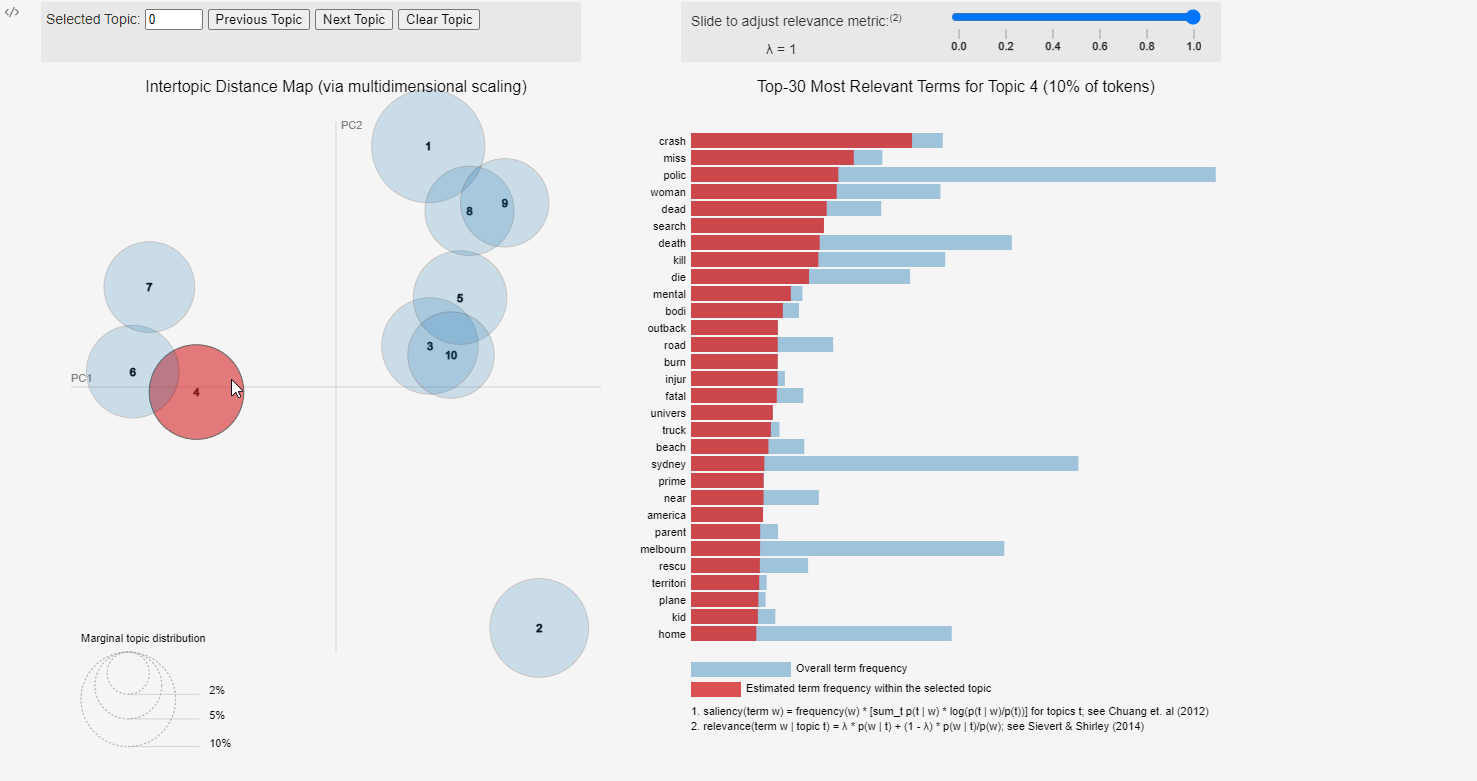

In [4]:
Image(filename='abctopic1.png')

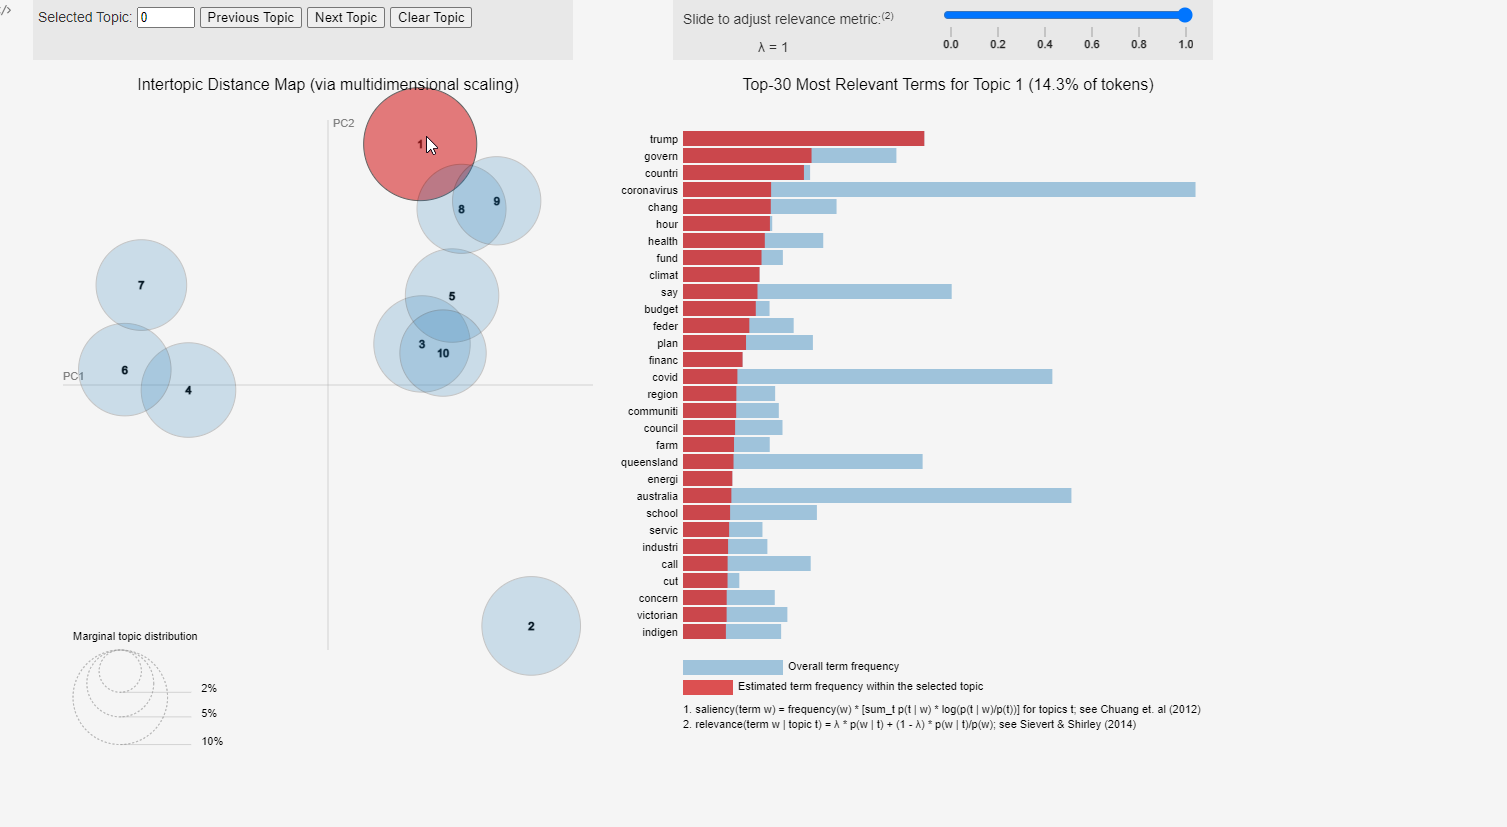

In [5]:
Image(filename='abctopic2.png')

## Salient Topics

In [30]:
sal_lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

![image](abctopic1.png)

In [31]:
print('\nPerplexity: ', sal_lda_model.log_perplexity(bow_corpus)) 


Perplexity:  -26.669018942235347


In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(sal_lda_model, bow_corpus, dictionary)
vis

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.126461 -0.365688       1        1  9.419286
3      0.099511  0.008669       2        1  8.010052
17     0.100171  0.009077       3        1  7.898894
6      0.123829  0.318042       4        1  7.587139
13     0.114376  0.022746       5        1  7.398491
15     0.085686  0.004868       6        1  6.298026
5      0.075763  0.003451       7        1  6.176714
11     0.022820  0.000275       8        1  5.614612
9      0.030159  0.000563       9        1  5.589214
8      0.037264  0.000802      10        1  5.374448
19     0.059109  0.001929      11        1  5.343997
16     0.057528  0.001843      12        1  5.246882
2      0.043892  0.001102      13        1  4.766644
10     0.012480  0.000006      14        1  4.224070
18    -0.036306 -0.000847      15        1  3.722968
14    -0.019026 -0.000605      16        1  3.719306
12    -0.234727 -0.001597      17        1  1.315686
4     -0.201419 -0.001657      18        1  1.197164
1     -0.234782 -0.001597      19        1  0.574617
0     -0.262788 -0.001381      20        1  0.521790, topic_info=              Term           Freq          Total Category  logprob  loglift
38       australia  241942.000000  241942.000000  Default  30.0000  30.0000
302           case  210918.000000  210918.000000  Default  29.0000  29.0000
25339  coronavirus  150662.000000  150662.000000  Default  28.0000  28.0000
240          polic  152044.000000  152044.000000  Default  27.0000  27.0000
27          record  126544.000000  126544.000000  Default  26.0000  26.0000
...            ...            ...            ...      ...      ...      ...
573      scientist       0.288155       4.890055  Topic20 -11.5537   2.4242
409            say       0.288178       4.905178  Topic20 -11.5537   2.4212
2475        govern       0.288166       4.897669  Topic20 -11.5537   2.4227
2211        sydney       0.288162       4.898044  Topic20 -11.5537   2.4226
25345        covid       0.288168       4.940552  Topic20 -11.5537   2.4140

[865 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
326      16  0.999772  aborigin
249      13  0.999685    access
215       9  0.999895     accus
34       14  0.999483   address
15        4  0.999392    affect
...     ...       ...       ...
6         2  0.999221       wit
354       1  0.997073       woe
210       2  0.999886      work
361       6  0.999847     young
117      16  0.999683     youth

[260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 18, 7, 14, 16, 6, 12, 10, 9, 20, 17, 3, 11, 19, 15, 13, 5, 2, 1])

In [ ]:
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[dictionary]

### MAllet

In [33]:
import zipfile
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
import urllib.request
url = 'http://mallet.cs.umass.edu/dist/'

In [43]:
urllib.request.urlretrieve(url,'mallet-2.0.8.zip')

('mallet-2.0.8.zip', <http.client.HTTPMessage at 0x203bd73cf70>)

In [ ]:
with zipfile.ZipFile('C:/Users/emreb/Documents/projects/newonelast/newtelegram/mallet-2.0.8.zip', 'r') as zip_ref:#the directory of zipped file
    zip_ref.extractall('C:/Users/emreb/Documents/projects/newonelast') #directory of unzipped file

In [28]:
import os

os.environ.update({
        'MALLET_HOME':
        r"C:/Users/emreb/Documents/projects/newonelast/redditdata/Mallet-202108-bin/Mallet-202108",
    })

In [29]:
mallet_path = 'C:/Users/emreb/Documents/projects/newonelast/redditdata/Mallet-202108-bin/Mallet-202108/bin/mallet' # update this path

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=20, id2word=dictionary)

In [33]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(9,
  [('miss', 0.03948213525391682),
   ('school', 0.0382228348331878),
   ('continu', 0.028274722340494628),
   ('famili', 0.0279968824195888),
   ('year', 0.024067432109634912),
   ('search', 0.02395918278980147),
   ('victim', 0.02099675973702632),
   ('student', 0.02060345387496482),
   ('bodi', 0.018034336684251168),
   ('rescu', 0.01708895929103912)]),
 (5,
  [('fund', 0.04975018603167854),
   ('health', 0.042479004996279365),
   ('hospit', 0.038510329187484496),
   ('boost', 0.03159703766698558),
   ('servic', 0.0313596258105666),
   ('group', 0.030867084795010807),
   ('urg', 0.026575954076751354),
   ('indigen', 0.026044434995216328),
   ('communiti', 0.02339038304808476),
   ('region', 0.022306084121753306)]),
 (14,
  [('kill', 0.057378948181326744),
   ('attack', 0.04631105245052268),
   ('forc', 0.02363467870456827),
   ('iraq', 0.02098442140144202),
   ('strike', 0.02048947268655354),
   ('bomb', 0.01742500298373339),
   ('dead', 0.016821235757060918),
   ('blast', 0.012

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=4, limit=40, step=4)


In [39]:
import matplotlib.pyplot as plt

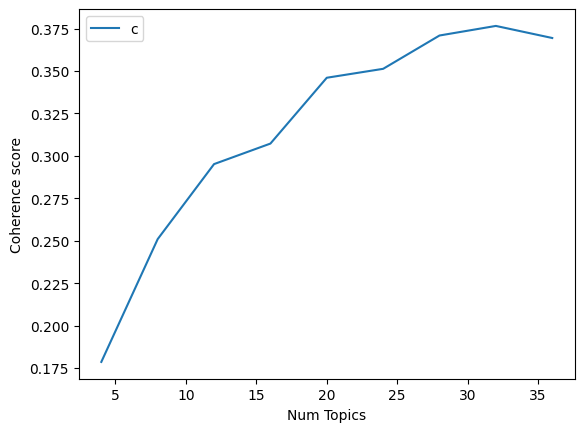

In [44]:
limit=40; start=4; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# optimum numbber of topics is 36 

In [46]:
mallet_lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=36, id2word=dictionary, passes=2, workers=4)
for idx, topic in mallet_lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.101*"elect" + 0.051*"arrest" + 0.046*"labor" + 0.043*"drug" + 0.031*"parti" + 0.031*"liber" + 0.030*"restrict" + 0.030*"campaign" + 0.029*"launch" + 0.027*"bodi"
Topic: 1 Word: 0.041*"tasmanian" + 0.039*"royal" + 0.037*"driver" + 0.033*"commiss" + 0.028*"media" + 0.028*"research" + 0.026*"doctor" + 0.026*"sexual" + 0.025*"drive" + 0.025*"senat"
Topic: 2 Word: 0.114*"govern" + 0.057*"tasmania" + 0.040*"scott" + 0.027*"town" + 0.024*"compani" + 0.024*"intern" + 0.023*"mine" + 0.022*"sign" + 0.020*"tour" + 0.019*"disabl"
Topic: 3 Word: 0.062*"bushfir" + 0.051*"victorian" + 0.036*"find" + 0.036*"season" + 0.036*"reveal" + 0.034*"inquiri" + 0.027*"start" + 0.027*"strike" + 0.024*"financ" + 0.023*"inquest"
Topic: 4 Word: 0.102*"charg" + 0.078*"murder" + 0.071*"crash" + 0.067*"school" + 0.052*"feder" + 0.052*"fund" + 0.036*"student" + 0.036*"victim" + 0.030*"port" + 0.027*"babi"
Topic: 5 Word: 0.051*"budget" + 0.047*"meet" + 0.043*"green" + 0.040*"emerg" + 0.038*"million" + 0

In [47]:
pyLDAvis.enable_notebook()
vism = pyLDAvis.gensim.prepare(mallet_lda_model, bow_corpus, dictionary)
vism

c:\Users\emreb\Documents\projects\translatortelegram\transtele\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20     0.165409 -0.062542       1        1  3.564023
4      0.193756  0.138508       2        1  3.499611
11    -0.107084  0.155943       3        1  3.053832
0      0.090713  0.073923       4        1  3.047724
30     0.062318  0.003315       5        1  3.020722
18    -0.108941 -0.034360       6        1  3.004924
35    -0.003637 -0.140305       7        1  2.972740
7     -0.012803 -0.124069       8        1  2.971217
1      0.068945  0.070627       9        1  2.966097
2     -0.089412  0.017959      10        1  2.954843
24     0.193307 -0.057782      11        1  2.954585
10    -0.112568  0.045564      12        1  2.948287
27    -0.037465  0.092741      13        1  2.901934
25     0.006352 -0.009172      14        1  2.867201
12     0.077921  0.032446      15        1  2.815325
33    -0.055300  0.161156      16        1  2.810452
19     0.039897 -0.133870      17        1  2.794242
14     0.223052  0.042667      18        1  2.756328
31    -0.042373 -0.121860      19        1  2.697197
5     -0.033717  0.101817      20        1  2.685602
16     0.018587  0.120195      21        1  2.671211
3     -0.015367 -0.018208      22        1  2.670465
34    -0.031782 -0.059971      23        1  2.660253
23    -0.039074  0.028312      24        1  2.639538
17    -0.107317  0.036210      25        1  2.613445
15    -0.035395 -0.008398      26        1  2.591702
8      0.008531 -0.192511      27        1  2.582009
13    -0.081937  0.054133      28        1  2.581312
21    -0.068449 -0.065542      29        1  2.573267
32    -0.084355 -0.039208      30        1  2.561770
26    -0.018343 -0.024034      31        1  2.538667
28    -0.029009  0.024778      32        1  2.507141
22    -0.077766 -0.034527      33        1  2.464873
29     0.002090 -0.086090      34        1  2.423440
6     -0.003259 -0.006068      35        1  2.394852
9      0.044477  0.018224      36        1  2.239169, topic_info=           Term          Freq         Total Category  logprob  loglift
38    australia  33157.000000  33157.000000  Default  30.0000  30.0000
1127       year  20876.000000  20876.000000  Default  29.0000  29.0000
7337      trump  19200.000000  19200.000000  Default  28.0000  28.0000
324       charg  20632.000000  20632.000000  Default  27.0000  27.0000
2475     govern  19329.000000  19329.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2711      emiss   1264.943565   1265.956184  Topic36  -4.6233   3.7983
1558       semi   1294.930124   1295.968525  Topic36  -4.5999   3.7983
3        licenc   1243.459832   1244.472974  Topic36  -4.6404   3.7983
2031      carri   1133.308057   1134.320797  Topic36  -4.7332   3.7982
240       polic   1411.964030  37562.046321  Topic36  -4.5133   0.5181

[1231 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
631       2  0.999386  abattoir
2586     29  0.999584    abbott
326       3  0.999828  aborigin
1939     21  0.999863      abus
1151     30  0.003954      accc
...     ...       ...       ...
1953     28  0.999481      york
361      33  0.999794     young
117      31  0.999681     youth
388      27  0.999801   zealand
937      11  0.998968      zone

[1993 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 5, 12, 1, 31, 19, 36, 8, 2, 3, 25, 11, 28, 26, 13, 34, 20, 15, 32, 6, 17, 4, 35, 24, 18, 16, 9, 14, 22, 33, 27, 29, 23, 30, 7, 10])

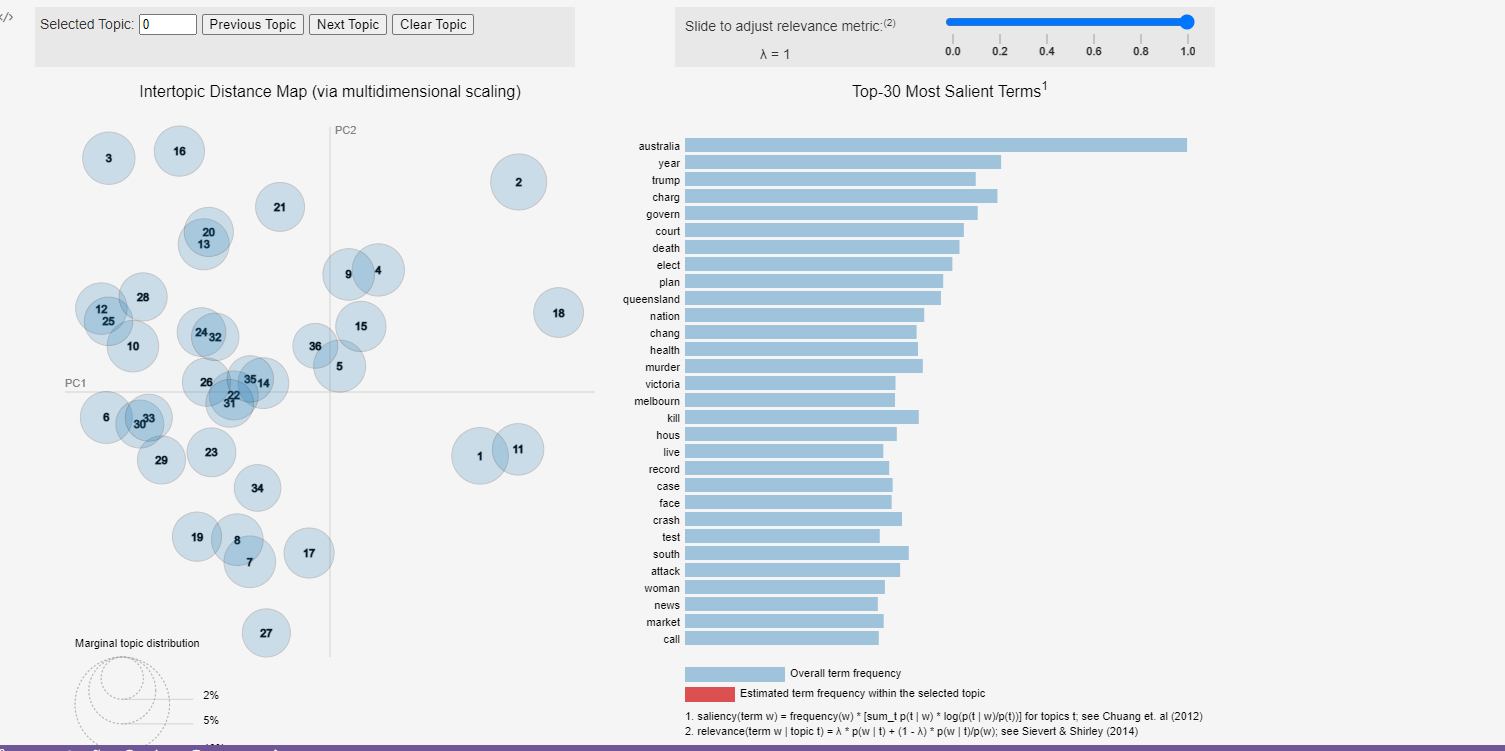

In [2]:
Image(filename='abcmallettopic1.png')

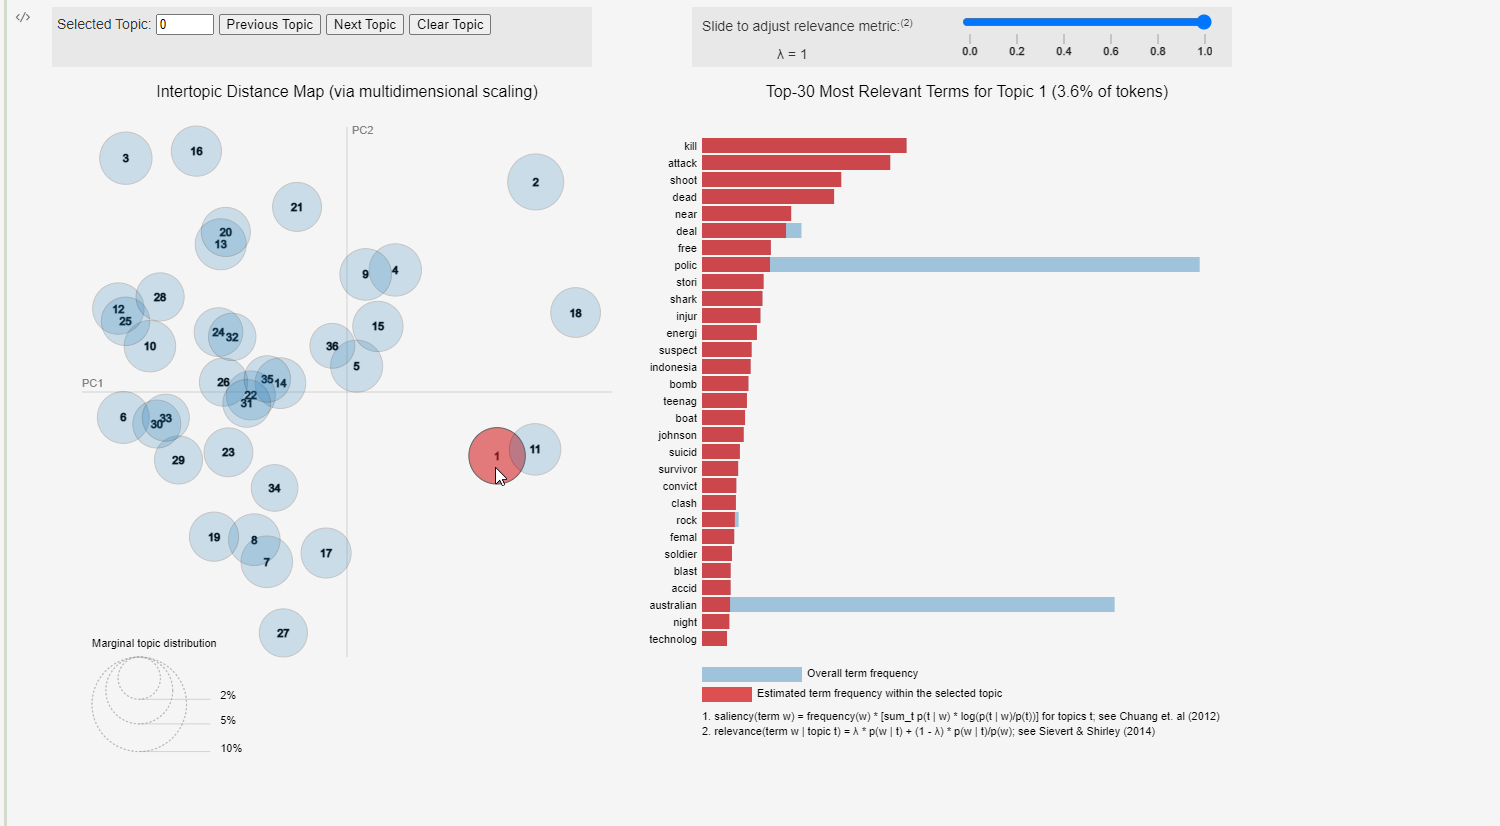

In [6]:
Image(filename='abcmallettopic2.png')